In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import statsmodels.formula.api as smf

In [2]:
data_url = 'data/EPA_fuel_economy.csv'


epa_df = pd.read_csv(data_url)


# Preview the data
epa_df.head()

,make,model,year,cylinders,trany,displ,VClass,co2,barrels08,fuelCost08,fuelType,highway08,city08,comb08
0,Acura,NSX,2000,6.0,Automatic 4-spd,3.0,Two Seaters,-1,18.311667,2600,Premium,22,15,18
1,Acura,NSX,2000,6.0,Manual 6-spd,3.2,Two Seaters,-1,18.311667,2600,Premium,22,15,18
2,BMW,M Coupe,2000,6.0,Manual 5-spd,3.2,Two Seaters,-1,17.347895,2500,Premium,23,17,19
3,BMW,Z3 Coupe,2000,6.0,Automatic 4-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
4,BMW,Z3 Coupe,2000,6.0,Manual 5-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19


The data dictionary is explained below:

- First Seven columns includes basic information about each vehicle (make, model, year, cylinders, trany (transmission type), displ (Engine Displacement), VClass (Type of Vehicle))

- co2: Estimated Annual CO2 Emissions 

- Barrels: Estimated Number of Barrels per year to operate the vehicle

- FuelCost: Estimate cost of fuel to operate the vehicle annually

- FuelType: Estimated Fuel Type for Analysis

- highway, city, comb : Estimated miles per gallon for highway, city and combined

> Axis represents a SINGLE PLOT, whilst a FIGURE represents a container for the axis

In [3]:
epa_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24210 entries, 0 to 24209
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   make        24210 non-null  object 
 1   model       24210 non-null  object 
 2   year        24210 non-null  int64  
 3   cylinders   23979 non-null  float64
 4   trany       24201 non-null  object 
 5   displ       23980 non-null  float64
 6   VClass      24210 non-null  object 
 7   co2         24210 non-null  int64  
 8   barrels08   24210 non-null  float64
 9   fuelCost08  24210 non-null  int64  
 10  fuelType    24210 non-null  object 
 11  highway08   24210 non-null  int64  
 12  city08      24210 non-null  int64  
 13  comb08      24210 non-null  int64  
dtypes: float64(3), int64(6), object(5)
memory usage: 2.6+ MB


## Histograms

### Functional Approach (Not Recommended)

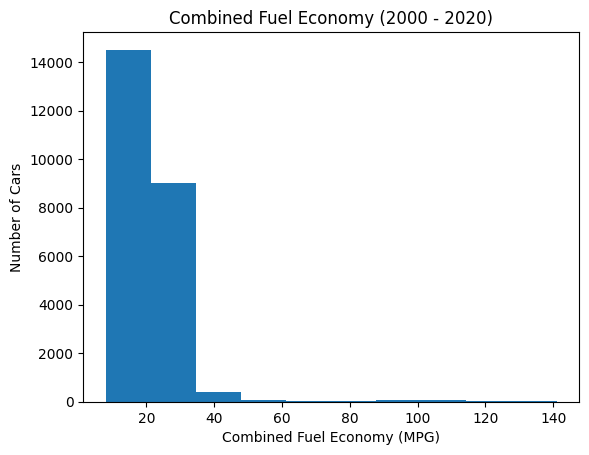

In [4]:
# Plot a histogram of the combined mpg - Functional Style (Not Recommended)
plt.hist(epa_df['comb08']);  # Note that the semi-colon suppresses the extra info
plt.xlabel('Combined Fuel Economy (MPG)')
plt.ylabel('Number of Cars')
plt.title('Combined Fuel Economy (2000 - 2020)')
plt.show()

### Object Oriented Approach (Recommended)

Text(0.5, 1.0, 'Combined Fuel Economy 2000-2020')

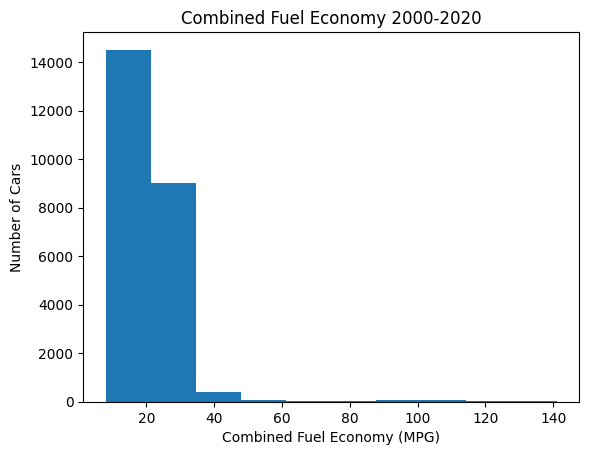

In [5]:
# Plot a histogram of the combined mpg - Object Oriented Style (Recommended)
fig, ax = plt.subplots()

# Remember that the axis the the plot and the figure is the container for the plot
ax.hist(epa_df['comb08']);
ax.set_xlabel('Combined Fuel Economy (MPG)')
ax.set_ylabel('Number of Cars')
ax.set_title('Combined Fuel Economy 2000-2020')

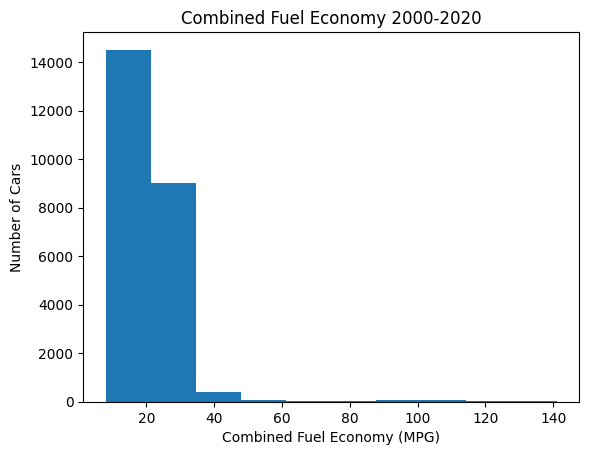

In [6]:
# Plot a histogram of the combined mpg - Object Oriented Style (Recommended)
fig, ax = plt.subplots()

# Remember that the axis the the plot and the figure is the container for the plot
ax.hist(epa_df['comb08']);
ax.set(xlabel='Combined Fuel Economy (MPG)',
       ylabel='Number of Cars',
       title='Combined Fuel Economy 2000-2020'
       );                                           # The semi-colon gets rd of the extra text

#### Customizing Your Plot

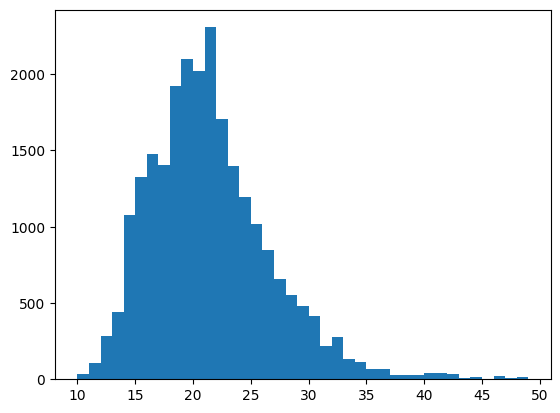

In [7]:
# Range
fig, ax = plt.subplots()

ax.hist(epa_df['comb08'], range(10, 50));

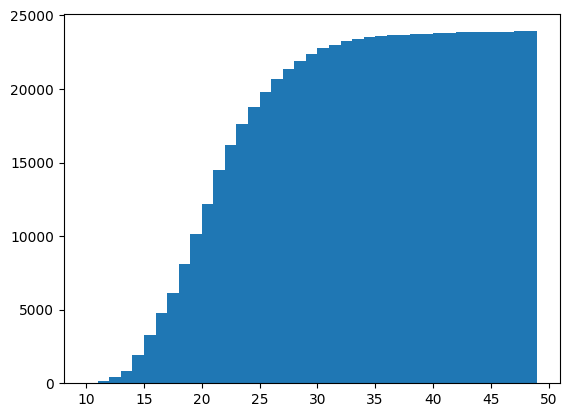

In [8]:
# Cumulative Histogram
fig, ax = plt.subplots()

ax.hist(epa_df['comb08'], range(10, 50), cumulative=True);

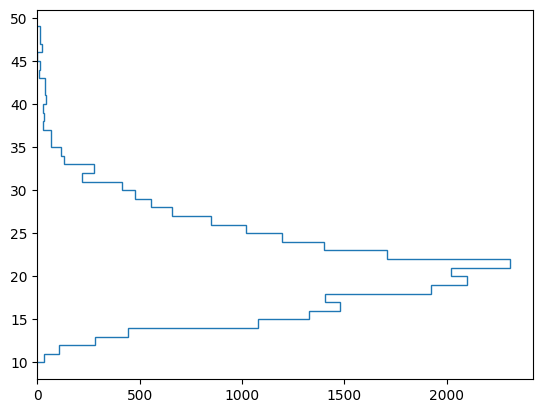

In [9]:
# Step Horizontal Histograms
fig, ax = plt.subplots()

ax.hist(epa_df['comb08'], range(10, 50), histtype='step', orientation='horizontal');

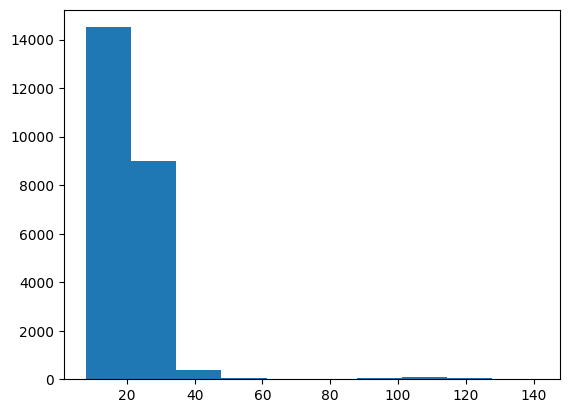

In [10]:
# Bin size of histograms
fig, ax = plt.subplots()

ax.hist(epa_df['comb08'], bins=10);

## Multiple Plots: Working with figures and axes

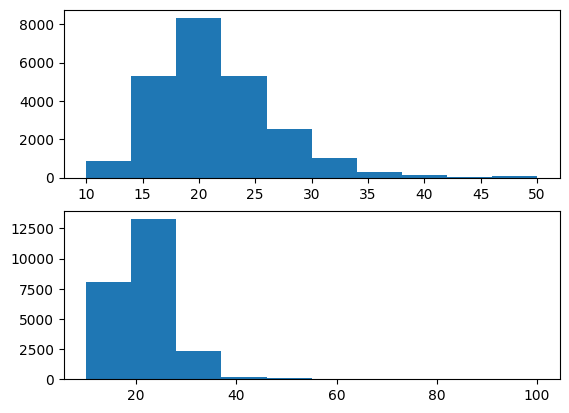

In [11]:
# One figure with 2 axis (plots)
fig, ax = plt.subplots(2)

ax[0].hist(epa_df['comb08'], range=(10, 50));
ax[1].hist(epa_df['comb08'], range=(10, 100));

[Text(0.5, 1.0, 'MPG Distribution'), Text(0, 0.5, 'MPG for vehicles')]

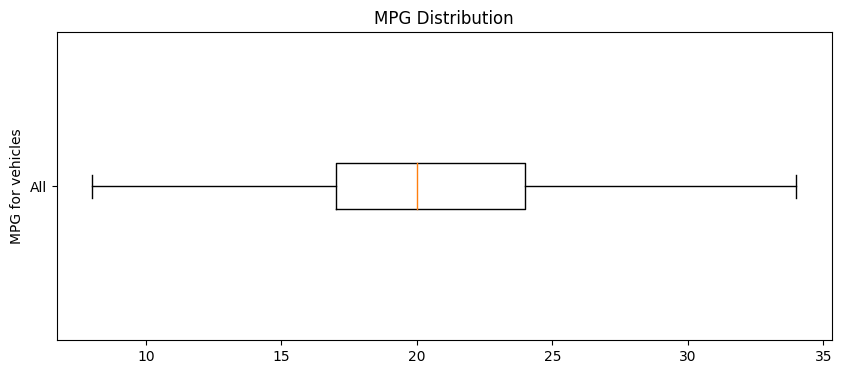

In [12]:
# Generate a box plot
fig, ax = plt.subplots(figsize=(10,4))
ax.boxplot(epa_df['comb08'], labels=['All'], showfliers=False, vert=False);
ax.set(title='MPG Distribution', ylabel='MPG for vehicles')

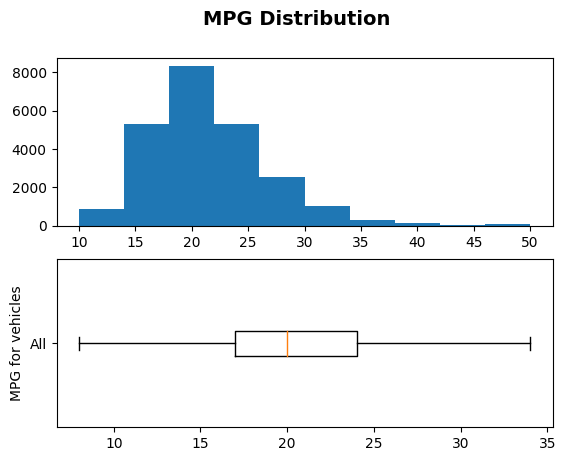

In [13]:
# One figure with 2 axis (plots)
fig, ax = plt.subplots(2)
ax[0].hist(epa_df['comb08'], range=(10, 50));
ax[1].boxplot(epa_df['comb08'], labels=['All'], showfliers=False, vert=False);
ax[1].set(ylabel='MPG for vehicles');

# Label the figure
fig.suptitle('MPG Distribution', fontsize=14, fontweight='bold');

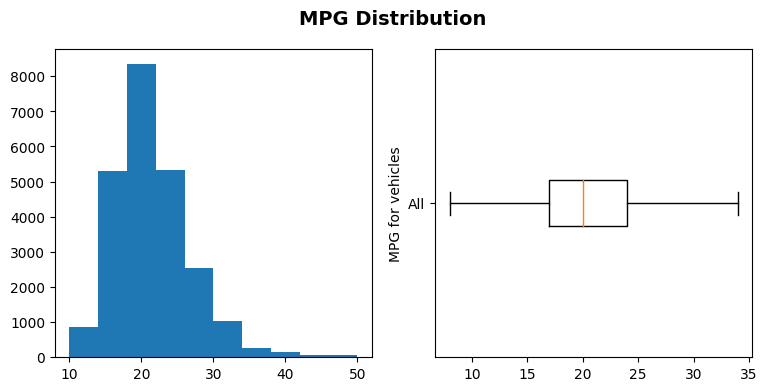

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4))

ax[0].hist(epa_df['comb08'], range=(10, 50));
ax[1].boxplot(epa_df['comb08'], labels=['All'], showfliers=False, vert=False);
ax[1].set(ylabel='MPG for vehicles');

# Label the figure
fig.suptitle('MPG Distribution', fontsize=14, fontweight='bold');

## Additional Plot Types

Going beyond histograms and boxplots with lineplots, barplots and scatter plots

#### Line Plots

In [15]:
avg_per_year = (
    epa_df
    # Group by the year
    .groupby('year', as_index=False)
    # Aggregate the column comb08 by mean
    .agg({'comb08': 'mean'}).round(2)
                )

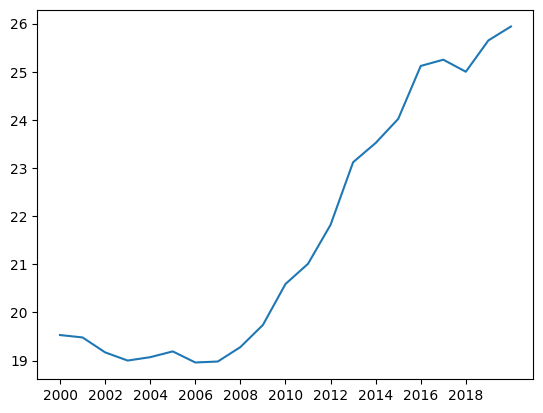

In [16]:
# Creating a lineplot
fig, ax = plt.subplots()
ax.plot(avg_per_year['year'], avg_per_year['comb08']);
ax.set_xticks(np.arange(2000, 2020, 2));

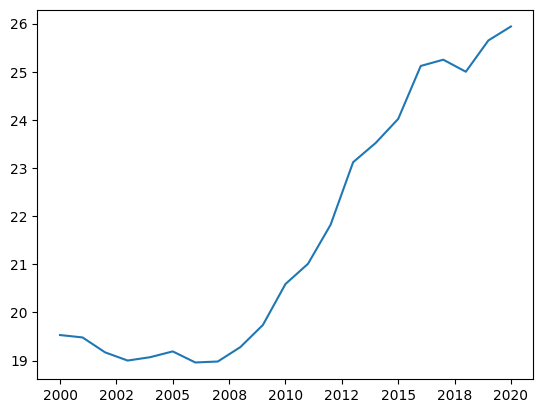

In [17]:
# Creating a lineplot
fig, ax = plt.subplots()
ax.plot(avg_per_year['year'], avg_per_year['comb08']);
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:0.0f}"))

#### Bar Plots

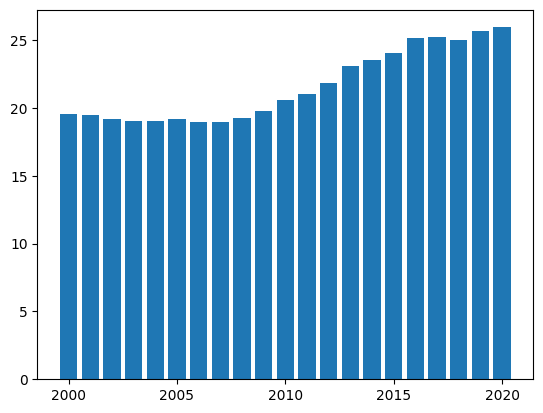

In [18]:
fig, ax = plt.subplots()
ax.bar(avg_per_year['year'], avg_per_year['comb08']);

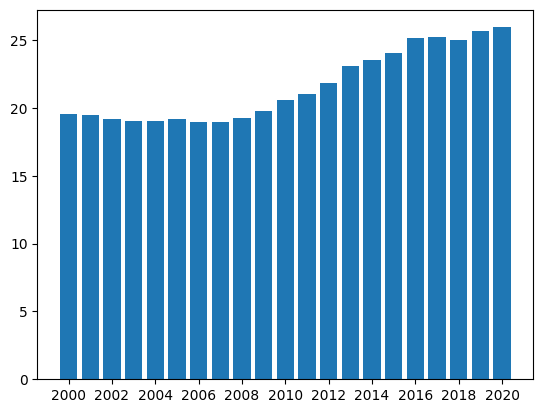

In [19]:
fig, ax = plt.subplots()
ax.bar(avg_per_year['year'], avg_per_year['comb08']);
ax.set_xticks(np.arange(2000, 2021, 2));

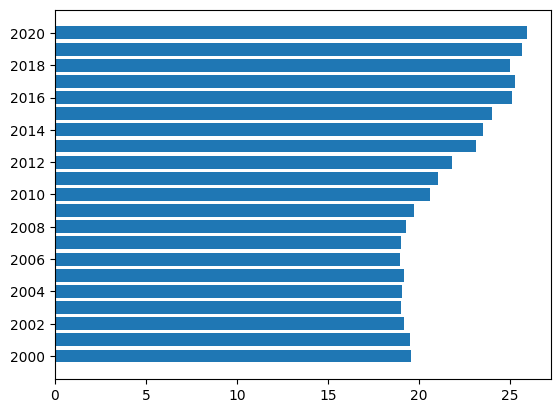

In [20]:
fig, ax = plt.subplots()
ax.barh(avg_per_year['year'], avg_per_year['comb08']);
ax.set_yticks(np.arange(2000, 2021, 2));

#### Scatterplots

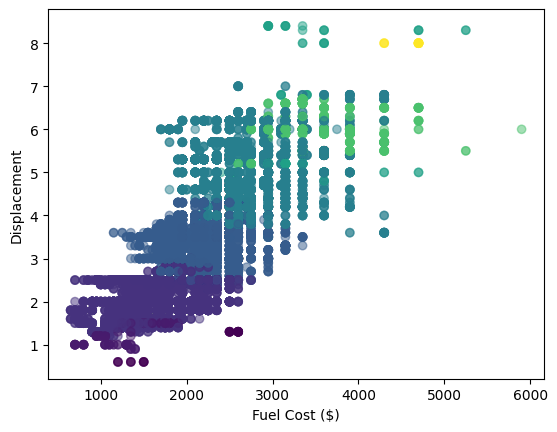

In [21]:
fig, ax = plt.subplots()
ax.scatter(x=epa_df['fuelCost08'], y=epa_df['displ'], alpha=0.5, c=epa_df['cylinders']);
ax.set(xlabel='Fuel Cost ($)', ylabel='Displacement');

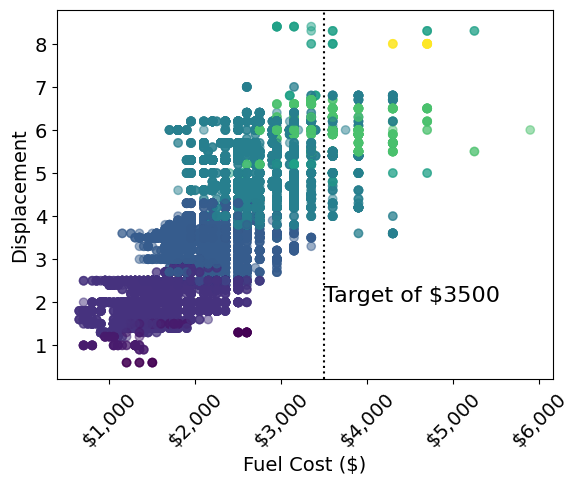

In [22]:
fig, ax = plt.subplots()
ax.scatter(x=epa_df['fuelCost08'], y=epa_df['displ'], alpha=0.5, c=epa_df['cylinders']);
ax.set_xlabel('Fuel Cost ($)', size=14)
ax.set_ylabel(ylabel='Displacement', size=14)
ax.xaxis.set_major_formatter('${x:,.0f}')
ax.tick_params(axis='x', labelrotation=45, labelsize=14)
ax.tick_params(axis='y', labelsize=14)
# Draw a vertical line at 3500 mark
ax.axvline(3500, color='black', linestyle=':');
# Annotate the text
ax.annotate('Target of $3500', xy=(3500,2), size=16);

## Using Styles

Get the plot styles
```
plt.style.available
```

In [23]:
# plt.style.use('ggplot')

In [24]:
# fig, ax = plt.subplots()
# ax.scatter(x=epa_df['fuelCost08'], y=epa_df['displ'], alpha=0.5, c=epa_df['cylinders']);
# ax.set(xlabel='Fuel Cost ($)', ylabel='Displacement');

C:\Users\INNO\AppData\Local\Temp\ipykernel_24260\3400016571.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


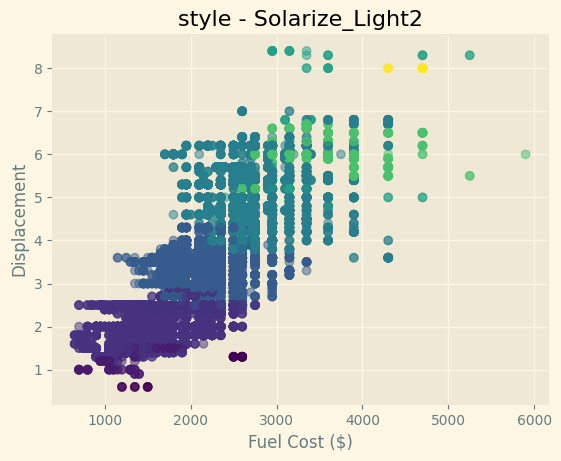

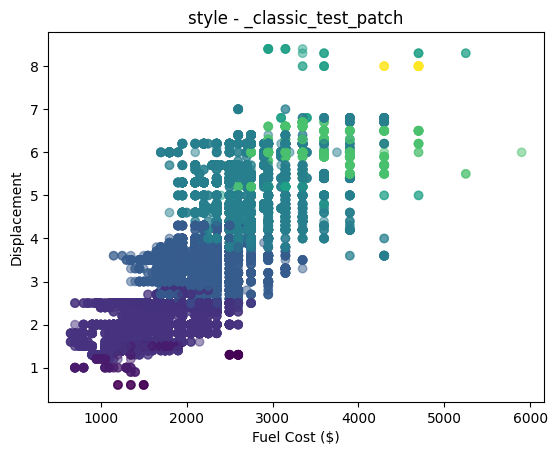

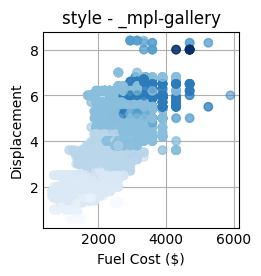

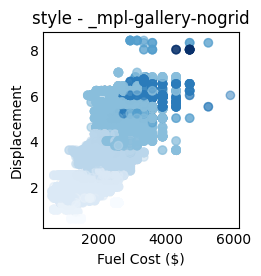

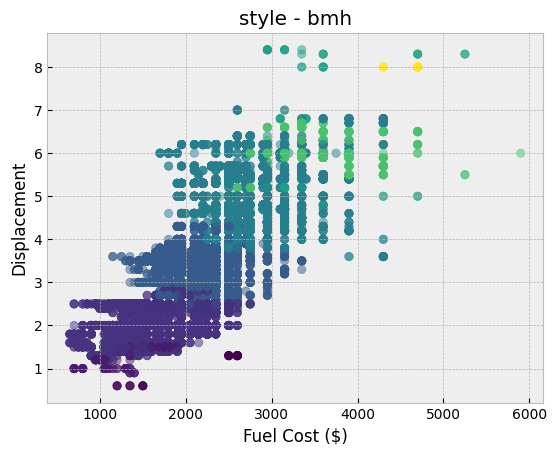

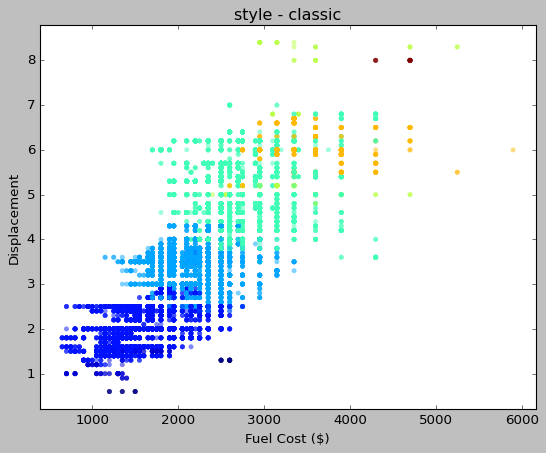

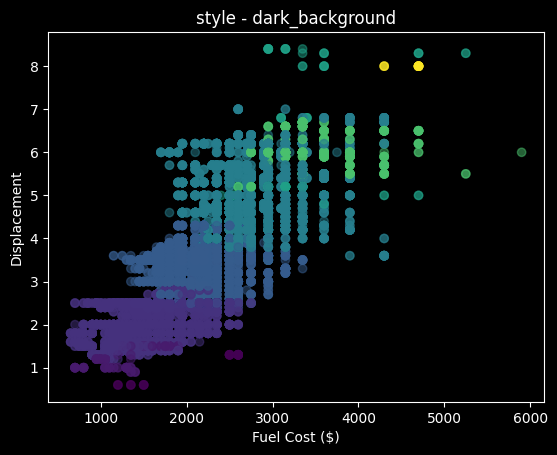

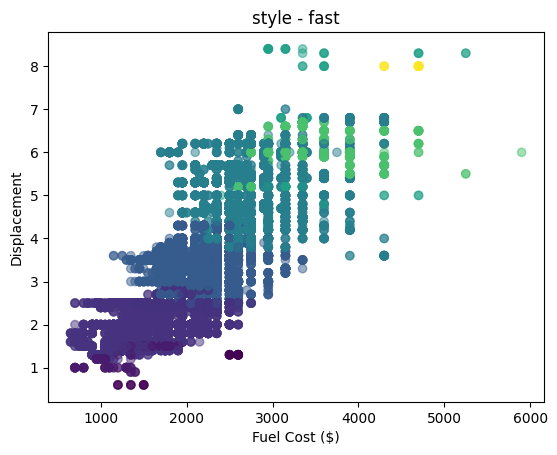

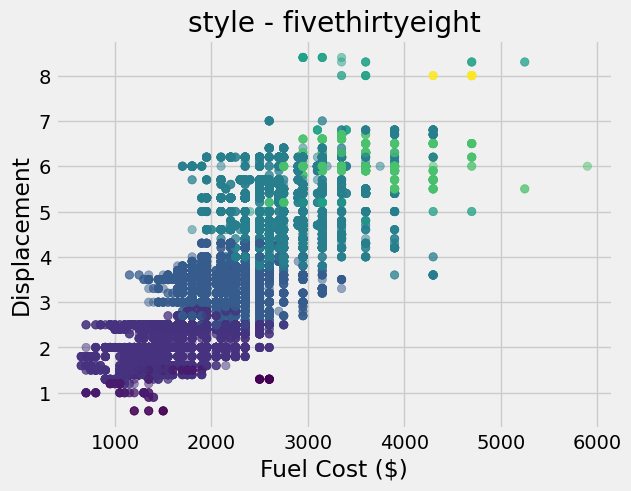

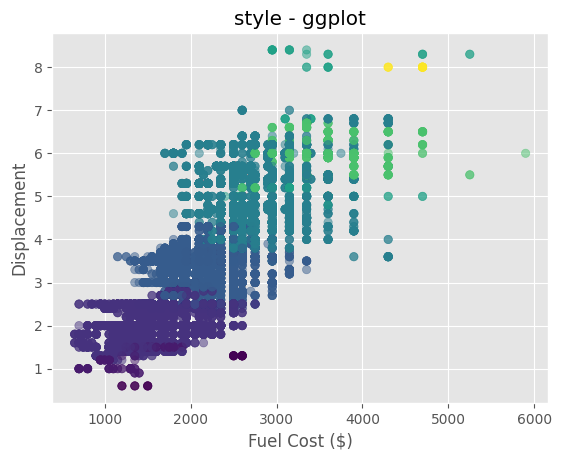

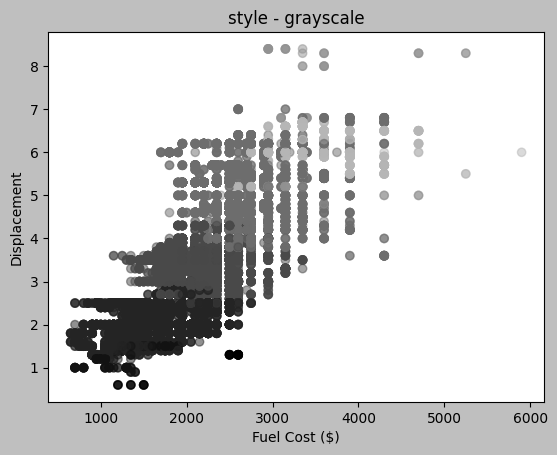

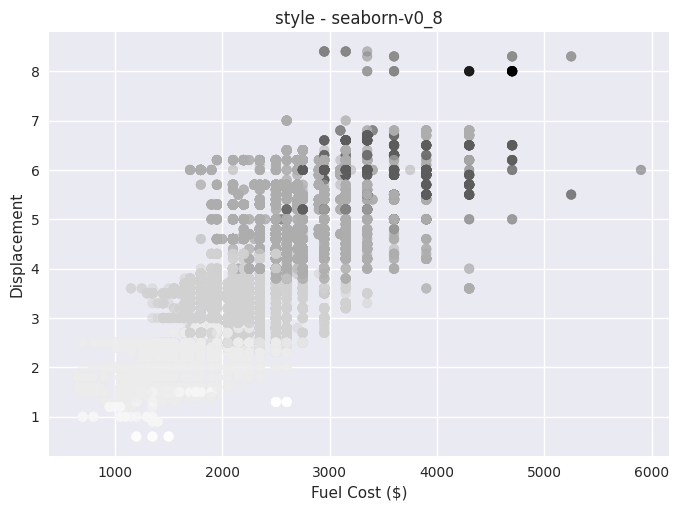

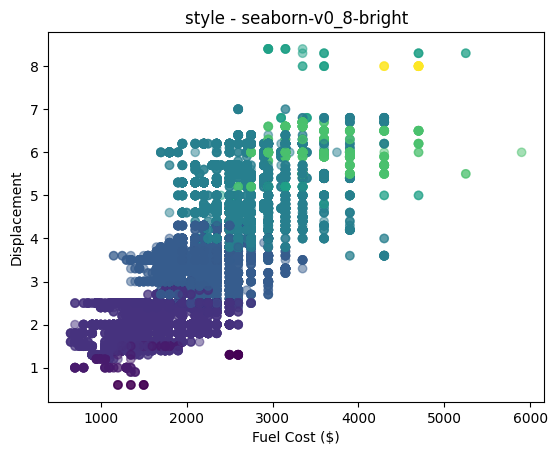

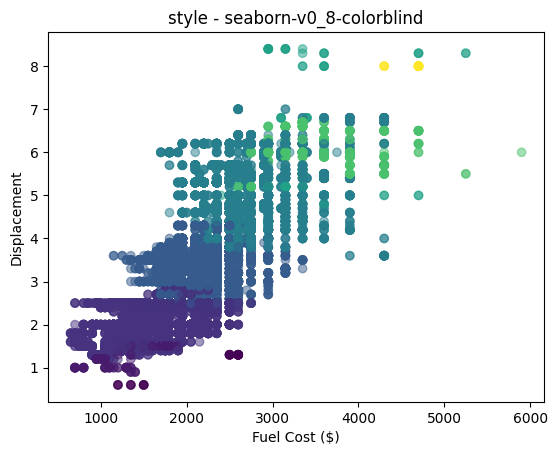

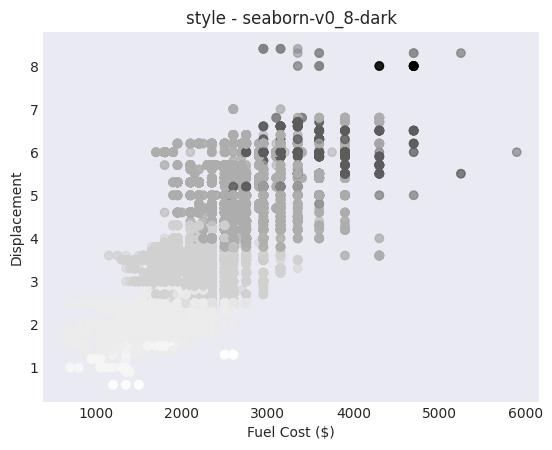

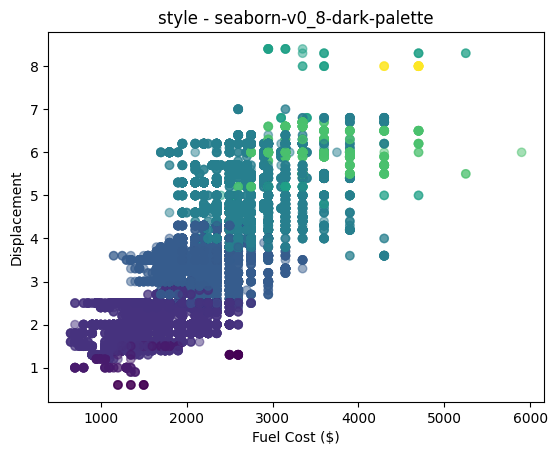

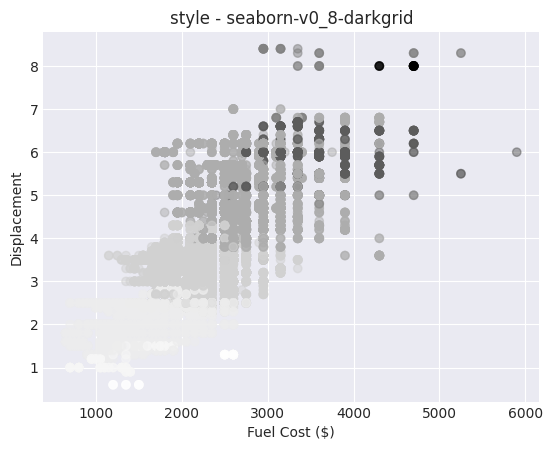

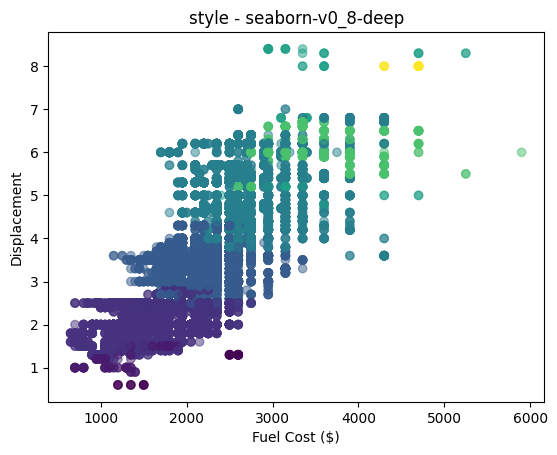

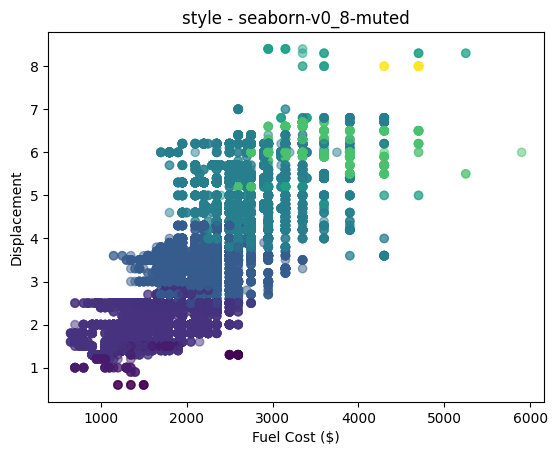

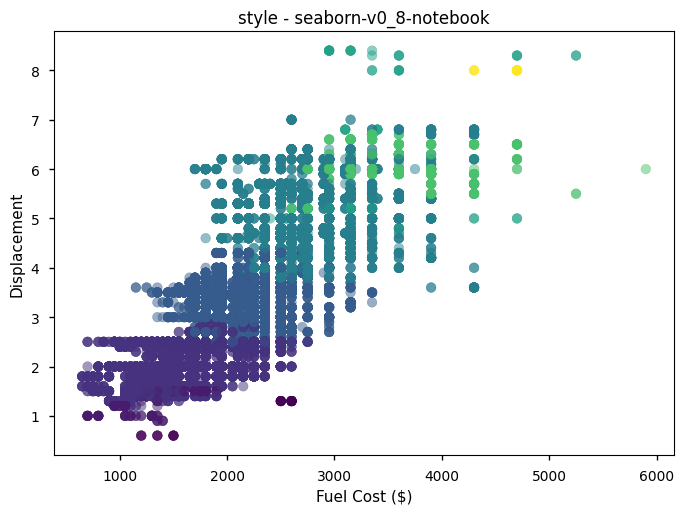

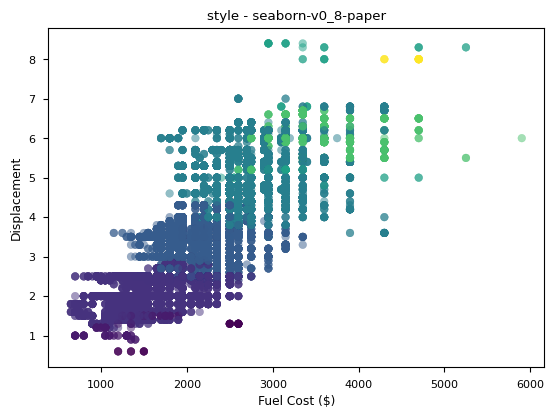

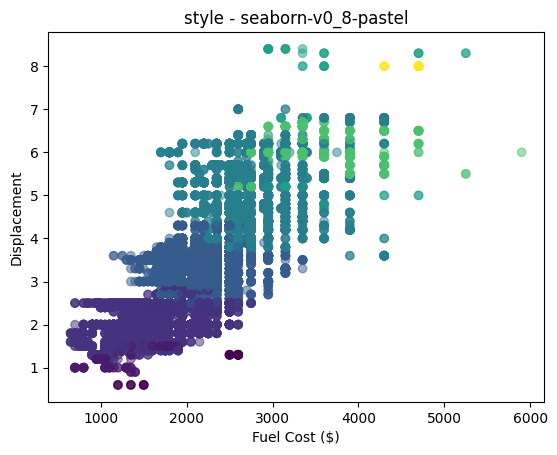

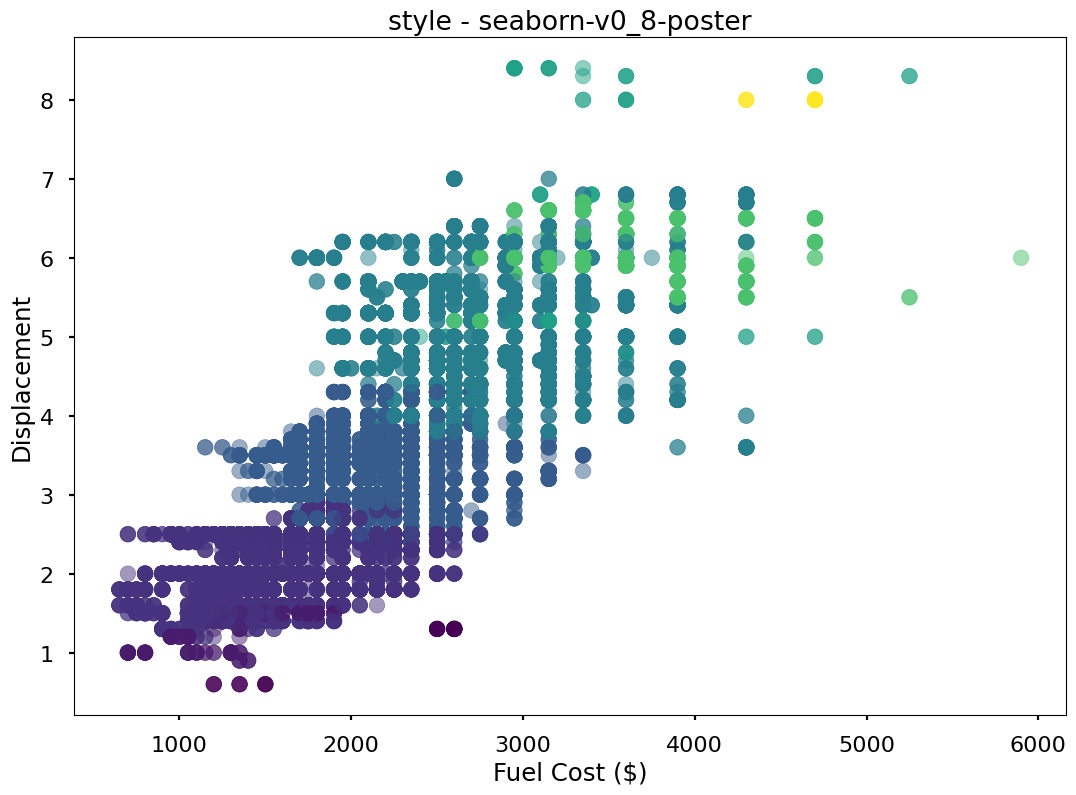

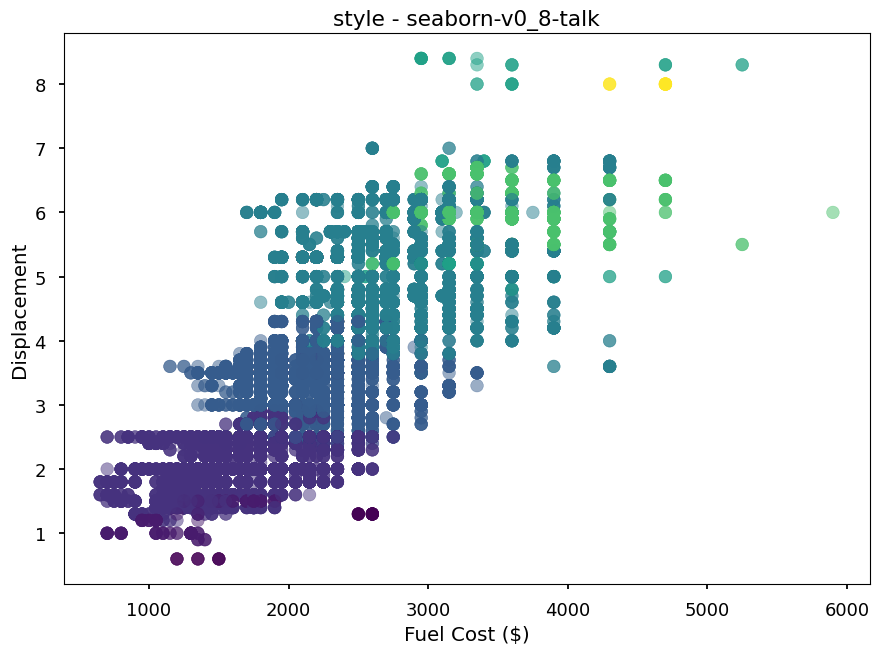

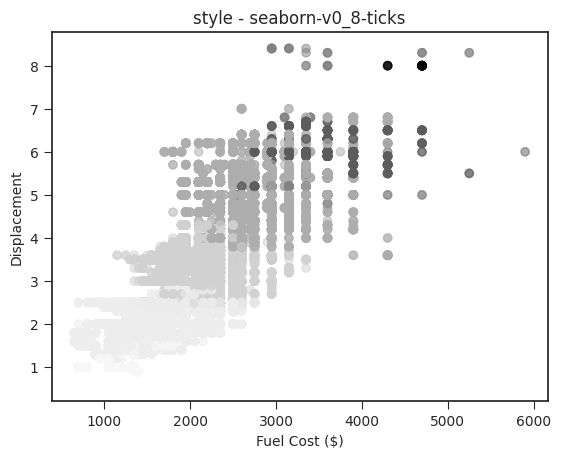

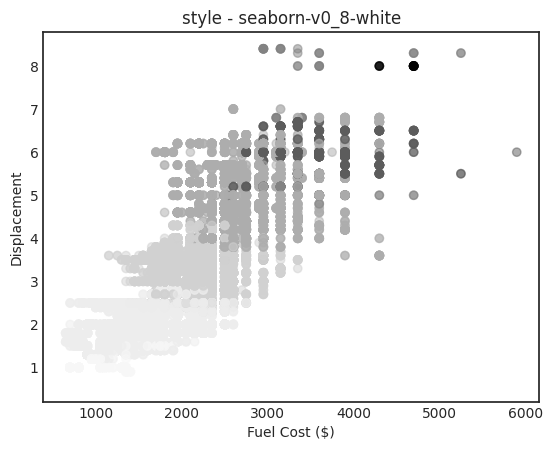

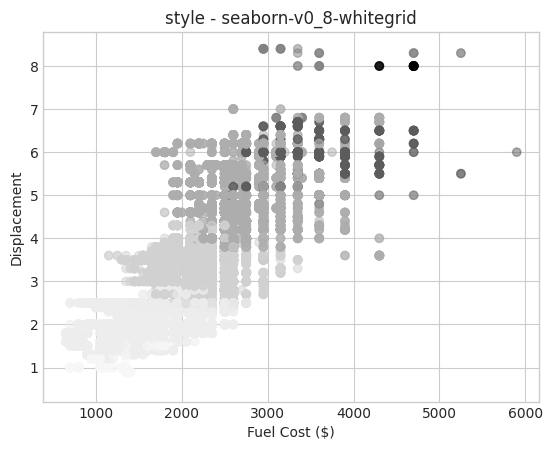

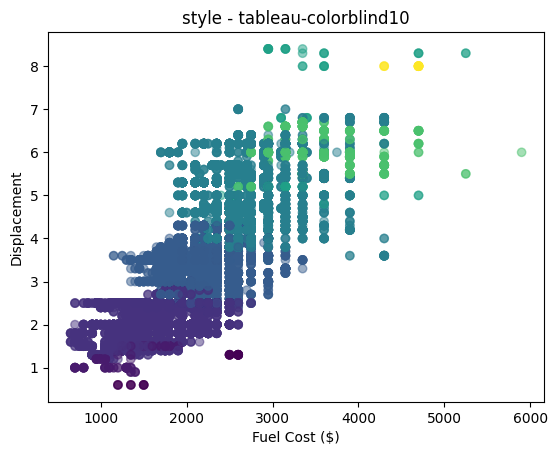

In [25]:
for style in plt.style.available:
    with plt.style.context(style):
        fig, ax = plt.subplots()
        ax.scatter(x=epa_df['fuelCost08'], y=epa_df['displ'], alpha=0.5, c=epa_df['cylinders']);
        ax.set(xlabel='Fuel Cost ($)', ylabel='Displacement', title=f'style - {style}');


## Scatterplots with the Regression Line


In [26]:
avg_fuel_per_year = (
    epa_df
    # Group by the year
    .groupby('year', as_index=False)
    # Aggregate the column comb08 by mean
    .agg({'fuelCost08': 'mean'}).round(2)
                )

In [27]:
# Build a statistical model fuel_cost per year
mpg_model = smf.ols('fuelCost08 ~ year', data=avg_fuel_per_year).fit()

mpg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             fuelCost08   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     73.69
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           5.79e-08
Time:                        14:33:34   Log-Likelihood:                -118.43
No. Observations:                  21   AIC:                             240.9
Df Residuals:                      19   BIC:                             242.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.659e+04   5182.756      8.990      0.000    3.57e+04    5.74e+04
year         -22.1341      2.578     -8.584      0.000     -27.531     -16.737
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.986   Jarque-Bera (JB):                0.137
Skew:                           0.063   Prob(JB):                        0.934
Kurtosis:                       2.624   Cond. No.                     6.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

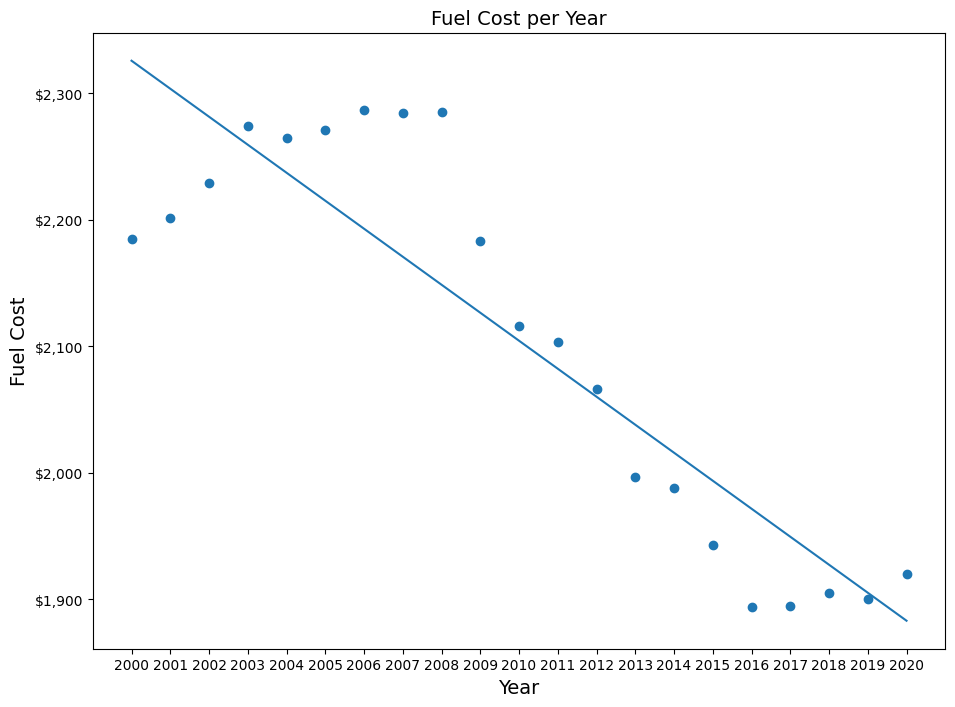

In [28]:
# Plotting regression lines

fig, ax = plt.subplots(figsize=(11,8))
ax.scatter(x=avg_fuel_per_year['year'], y=avg_fuel_per_year['fuelCost08'])
ax.plot(avg_fuel_per_year['year'], mpg_model.fittedvalues);
ax.set_title('Fuel Cost per Year', size=14)
ax.set_xlabel('Year', size=14)
ax.set_ylabel('Fuel Cost', size=14)
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.set_xticks(np.arange(2000, 2021));

In [29]:
epa_2020_df = epa_df.query('year >= 2010')
avg_fuel_cost = epa_2020_df['fuelCost08'].mean().round(0)

Text(0.5, 0.98, 'EPA Estimated Fuel Costs')

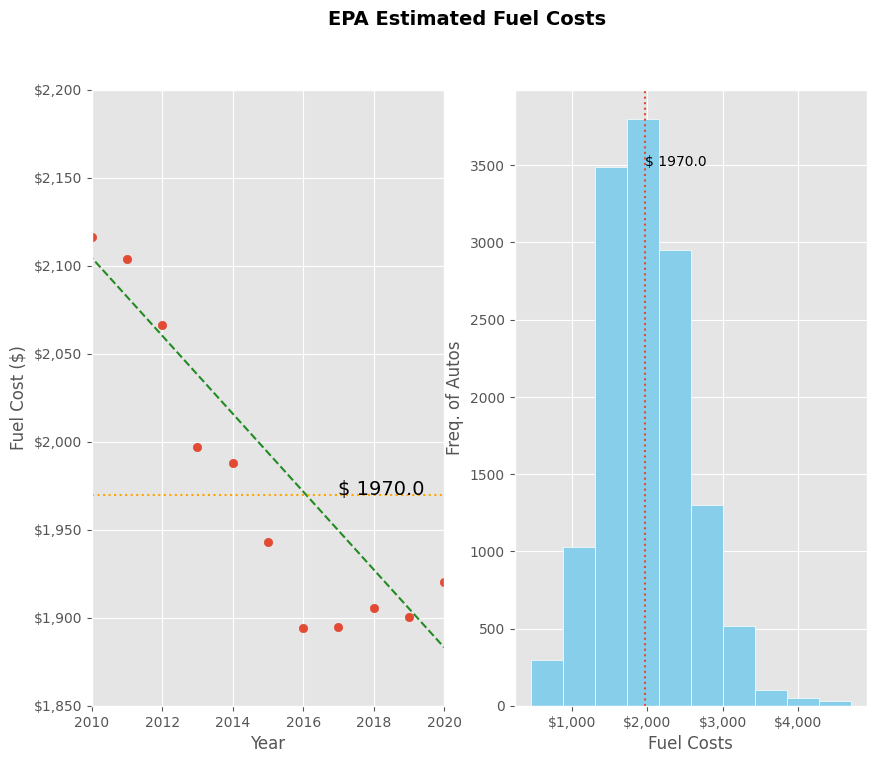

In [30]:
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,8))

# Plot 1
ax[0].scatter(x=avg_fuel_per_year['year'], 
              y=avg_fuel_per_year['fuelCost08'])

ax[0].plot(avg_fuel_per_year['year'],
           mpg_model.fittedvalues, color='forestgreen',
           linestyle='--');

ax[0].set(xlabel='Year', ylabel='Fuel Cost ($)', ylim=(1850, 2200), xlim=(2010, 2020));
ax[0].yaxis.set_major_formatter('${x:,.0f}')
ax[0].axhline(y=avg_fuel_cost, linestyle=':', color='orange');
ax[0].annotate(f'$ {avg_fuel_cost}', xy=(2017, avg_fuel_cost), size=14);

# Plot 2
ax[1].hist(epa_2020_df['fuelCost08'], color='skyblue', ec='white')
ax[1].xaxis.set_major_formatter('${x:,.0f}')
ax[1].set(xlabel='Fuel Costs', ylabel='Freq. of Autos')
ax[1].axvline(avg_fuel_cost, linestyle=':')
ax[1].annotate(f'$ {avg_fuel_cost}', xy=(avg_fuel_cost, 3500))

fig.suptitle('EPA Estimated Fuel Costs', weight='bold', size=14)